ARIMA and Seasonal ARIMA
Autoregressive Integrated Moving Averages
The general process for ARIMA models is the following:

Visualize the Time Series Data
Make the time series data stationary
Plot the Correlation and AutoCorrelation Charts
Construct the ARIMA Model or Seasonal ARIMA based on the data
Use the model to make predictions
Let's go through these steps!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('consumption project.csv')

In [3]:
df.head()

,date,unit
0,1/1/2019,42140
1,1/2/2019,38710
2,1/3/2019,57460
3,1/4/2019,51030
4,1/5/2019,41140


In [4]:
df.tail()

,date,unit
31,1/8/2021,54740
32,1/9/2021,65110
33,1/10/2021,46460
34,1/11/2021,55160
35,1/12/2021,57280


In [5]:
## Cleaning up the data
df.columns=["Date","unit"]
df.head()

,Date,unit
0,1/1/2019,42140
1,1/2/2019,38710
2,1/3/2019,57460
3,1/4/2019,51030
4,1/5/2019,41140


In [ ]:
# Convert Month into Datetime
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.head()

,Date,unit
0,1/1/2019,42140
1,1/2/2019,38710
2,1/3/2019,57460
3,1/4/2019,51030
4,1/5/2019,41140


In [7]:
df.set_index('Date',inplace=True)

In [8]:
df.describe()

,unit
count,36.000000
mean,45246.138889
std,12176.051159
min,1.000000
25%,40832.500000
50%,48045.000000
75%,53692.500000
max,65110.000000


Step 2: Visualize the Data

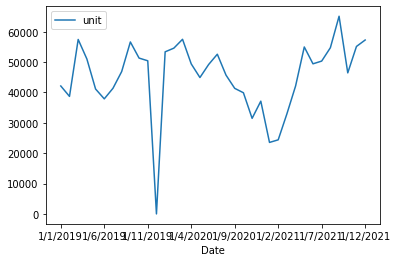

In [9]:
df.plot()

In [10]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['unit'])

In [11]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(unit):
    result=adfuller(unit)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [12]:
adfuller_test(df['unit'])

ADF Test Statistic : -4.274371416244105
p-value : 0.0004918635505264071
#Lags Used : 0
Number of Observations Used : 35
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Differencing

In [13]:
df['unit First Difference'] = df['unit'] - df['unit'].shift(1)

In [14]:
df['unit'].shift(1)

Date
1/1/2019         NaN
1/2/2019     42140.0
1/3/2019     38710.0
1/4/2019     57460.0
1/5/2019     51030.0
1/6/2019     41140.0
1/7/2019     37900.0
1/8/2019     41380.0
1/9/2019     46880.0
1/10/2019    56640.0
1/11/2019    51330.0
1/12/2019    50440.0
1/1/2020         1.0
1/2/2020     53390.0
1/3/2020     54600.0
1/4/2020     57520.0
1/5/2020     49410.0
1/6/2020     44920.0
1/7/2020     49210.0
1/8/2020     52600.0
1/9/2020     45710.0
1/10/2020    41360.0
1/11/2020    39910.0
1/12/2020    31480.0
1/1/2021     37140.0
1/2/2021     23550.0
1/3/2021     24400.0
1/4/2021     32950.0
1/5/2021     42140.0
1/6/2021     54990.0
1/7/2021     49440.0
1/8/2021     50340.0
1/9/2021     54740.0
1/10/2021    65110.0
1/11/2021    46460.0
1/12/2021    55160.0
Name: unit, dtype: float64

In [15]:
df['Seasonal First Difference']=df['unit']-df['unit'].shift(1)

In [16]:
df.head(1)

,unit,unit First Difference,Seasonal First Difference
Date,,,
1/1/2019,42140,NaN,NaN


In [17]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -5.3199372707332895
p-value : 4.978281595810341e-06
#Lags Used : 2
Number of Observations Used : 32
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


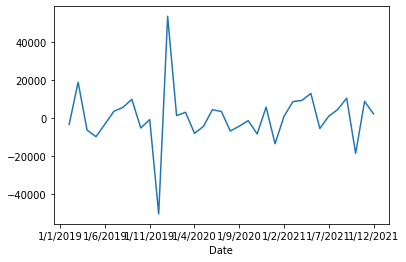

In [18]:
df['Seasonal First Difference'].plot()

Auto Regressive Model

In [19]:
import statsmodels.api as sm

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

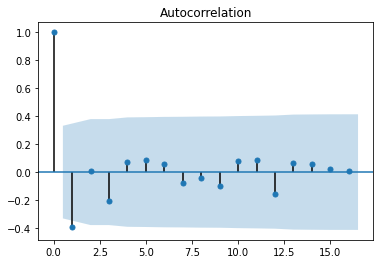

In [21]:
first_diff = plot_acf(df['Seasonal First Difference'].dropna())

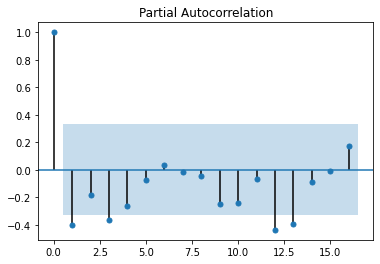

In [22]:
first_difff = plot_pacf(df['Seasonal First Difference'].dropna())

In [23]:
# For non-seasonal data
#p=0, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [24]:
model=ARIMA(df['unit'],order=(0,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [25]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.unit   No. Observations:                   35
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -380.508
Method:                       css-mle   S.D. of innovations          12106.738
Date:                Thu, 24 Nov 2022   AIC                            767.015
Time:                        12:07:07   BIC                            771.681
Sample:                             1   HQIC                           768.626
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          123.0745    194.236      0.634      0.526    -257.622     503.771
ma.L1.D.unit    -1.0000      0.183     -5.472      0.000      -1.358      -0.642
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

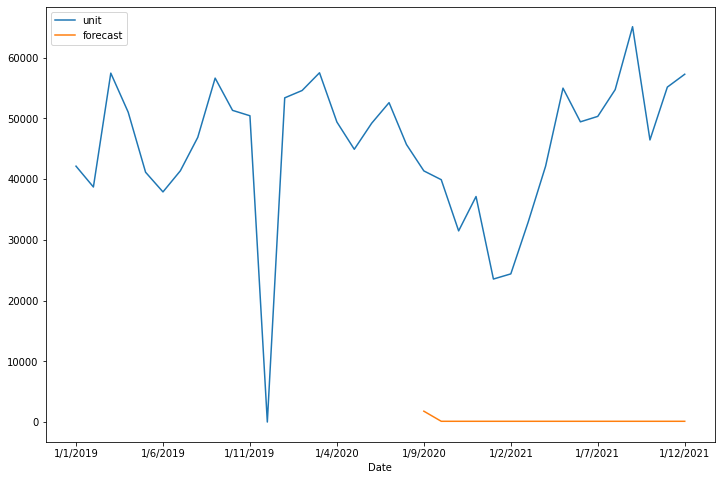

In [26]:
df['forecast']=model_fit.predict(start=20,end=35,dynamic=True)
df[['unit','forecast']].plot(figsize=(12,8))

In [27]:
import statsmodels.api as sm

In [28]:
model=sm.tsa.statespace.SARIMAX(df['unit'],order=(0, 1, 1),seasonal_order=(0,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


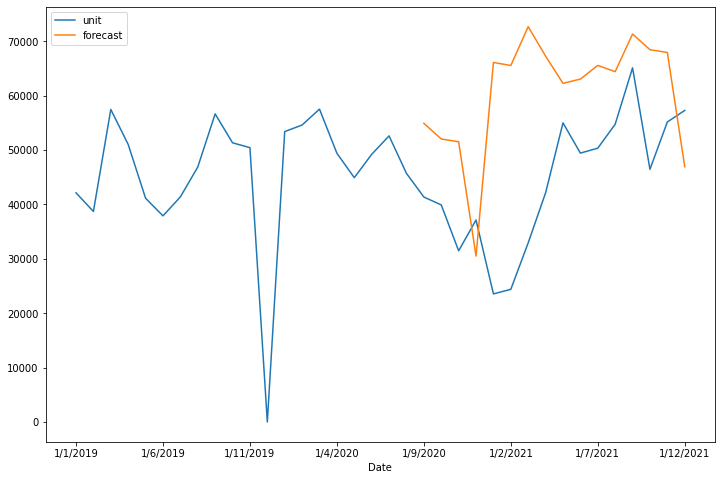

In [29]:
df['forecast']=results.predict(start=20,end=35,dynamic=True)
df[['unit','forecast']].plot(figsize=(12,8))